In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
X = tf.range(-100, 100, 4)
y = X + 50

X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-50, -46, -42, -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,
          2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
         54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102,
        106, 110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

In [3]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-50, -46, -42, -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,
          2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
         54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102,
        106], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

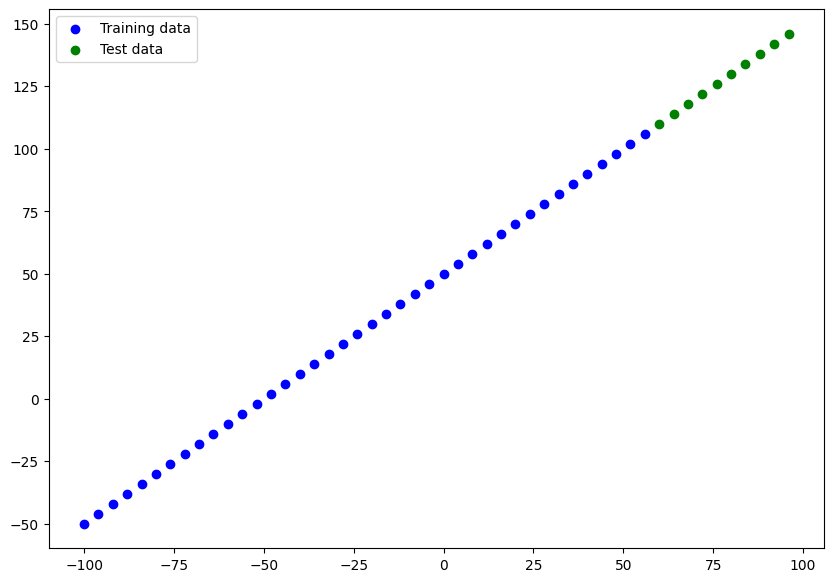

In [4]:
plt.figure(figsize=[10,7])
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Test data")
plt.legend();

## Creating model_1

### Parameters of model_1
1. no. of layers = 1
2. no. of neurons = 1
3. loss = mae
4. optimizer = SGD
5. epochs = 100

In [5]:
tf.random.set_seed(40)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="Layer_1")
])

model_1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


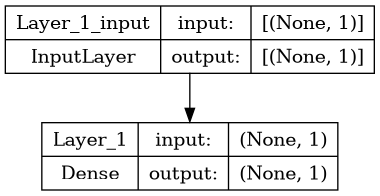

In [6]:
plot_model(model_1, show_shapes=True)

In [7]:
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 54.3747 - mae: 54.3747
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 44.7778 - mae: 44.7778
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 38.2131 - mae: 38.2131
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 39.7908 - mae: 39.7908
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 38.7280 - mae: 38.7280
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 38.0432 - mae: 38.0432
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 38.2372 - mae: 38.2372
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 39.6006 - mae: 39.6006
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.5550 - mae: 40.5550
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 39.9732 - mae: 39.9732
Epoch 11/100
2/2 [==============================] - 0s 5ms

In [8]:
y_pred_1 = model_1.predict(X_test)
y_pred_1, y_test

1/1 [==============================] - 0s 78ms/step


(array([[28.148716],
        [29.92638 ],
        [31.704044],
        [33.48171 ],
        [35.259373],
        [37.037037],
        [38.8147  ],
        [40.592365],
        [42.37003 ],
        [44.147697]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

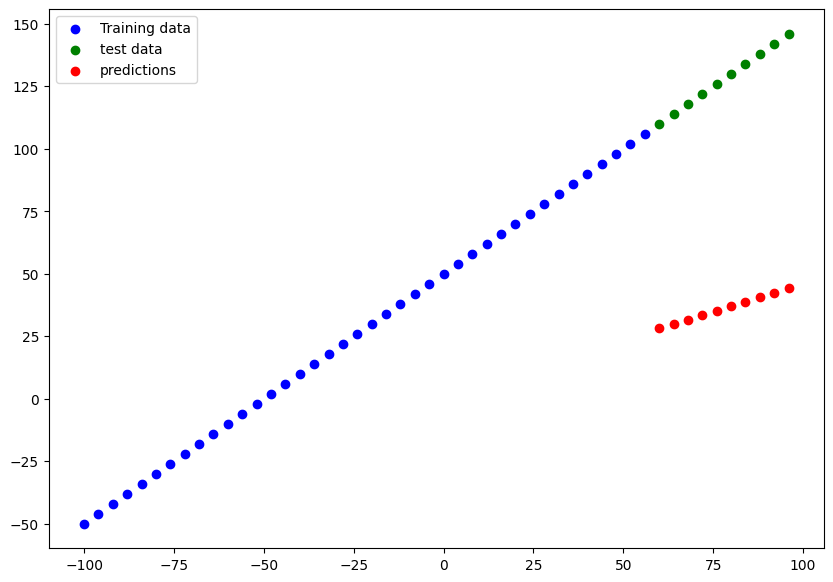

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label = "Training data")
plt.scatter(X_test, y_test, c="g", label = "test data")
plt.scatter(X_test, y_pred_1, c="r", label = "predictions")
plt.legend();

## Conclusion

1. predicted values vs. test values are too far using simple model

## Creating model_2

### Parameters of model_2

1. no. of layers = 2
2. no. of neurons = 1 and 50
3. loss = mae
4. optimizer = SGD
5. epochs = 100
6. learning_rate = 0.01

In [10]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape = [1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

model_2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
               metrics = ["mae"])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


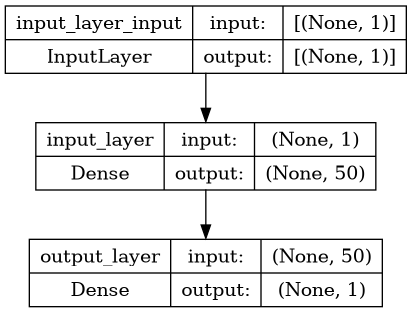

In [11]:
plot_model(model_2, show_shapes=True)

In [12]:
model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 45.7585 - mae: 45.7585
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 45.1202 - mae: 45.1202
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 52.3196 - mae: 52.3196
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 38.5493 - mae: 38.5493
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 40.2419 - mae: 40.2419
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 41.4587 - mae: 41.4587
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 38.1411 - mae: 38.1411
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 38.3307 - mae: 38.3307
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 47.6113 - mae: 47.6113
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 44.1363 - mae: 44.1363
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [13]:
y_pred_2 = model_2.predict(X_test)
y_pred_2, y_test

1/1 [==============================] - 0s 61ms/step


(array([[38.34573 ],
        [40.741028],
        [43.136326],
        [45.531624],
        [47.926918],
        [50.322216],
        [52.71751 ],
        [55.112812],
        [57.508106],
        [59.903408]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

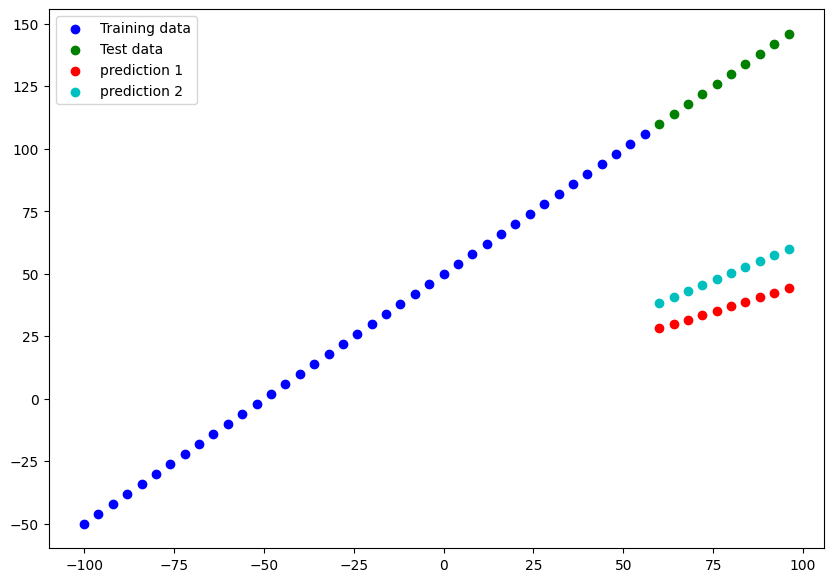

In [14]:
plt.figure(figsize = [10,7])
plt.scatter(X_train, y_train, c="b", label = "Training data")
plt.scatter(X_test, y_test, c="g", label = "Test data")
plt.scatter(X_test, y_pred_1, c="r", label = "prediction 1")
plt.scatter(X_test, y_pred_2, c="c", label = "prediction 2")
plt.legend();

### Conclusion
1. model_2 precision increase when the layers and neurons increases
2. learning_rate of 0.01 also played significant part

## Creating model_3

### Parameters of model_2

1. no. of layers = 2
2. no. of neurons = 1 and 50
3. loss = mae
4. optimizer = Adam
5. epochs = 100
6. learning_rate = 0.01

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50,input_shape = [1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
])

model_3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ["mae"])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


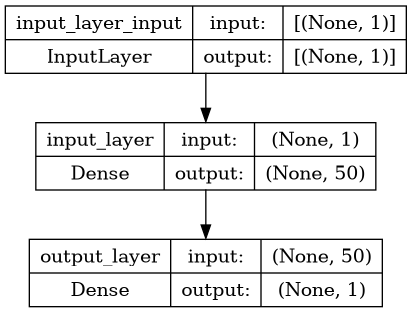

In [16]:
plot_model(model_3, show_shapes=True)

In [17]:
model_3.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 58.9145 - mae: 58.9145
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 48.8899 - mae: 48.8899
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 41.4924 - mae: 41.4924
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 37.3265 - mae: 37.3265
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 40.6592 - mae: 40.6592
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 43.3605 - mae: 43.3605
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 43.7162 - mae: 43.7162
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 42.2050 - mae: 42.2050
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 40.1701 - mae: 40.1701
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 37.7640 - mae: 37.7640
Epoch 11/100
2/2 [==============================] - 0s 5ms/

In [18]:
y_pred_3 = model_3.predict(X_test)
y_pred_3, y_test

1/1 [==============================] - 0s 47ms/step


(array([[ 98.96968],
        [102.23759],
        [105.50549],
        [108.77342],
        [112.04132],
        [115.30923],
        [118.57715],
        [121.84506],
        [125.11297],
        [128.38087]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

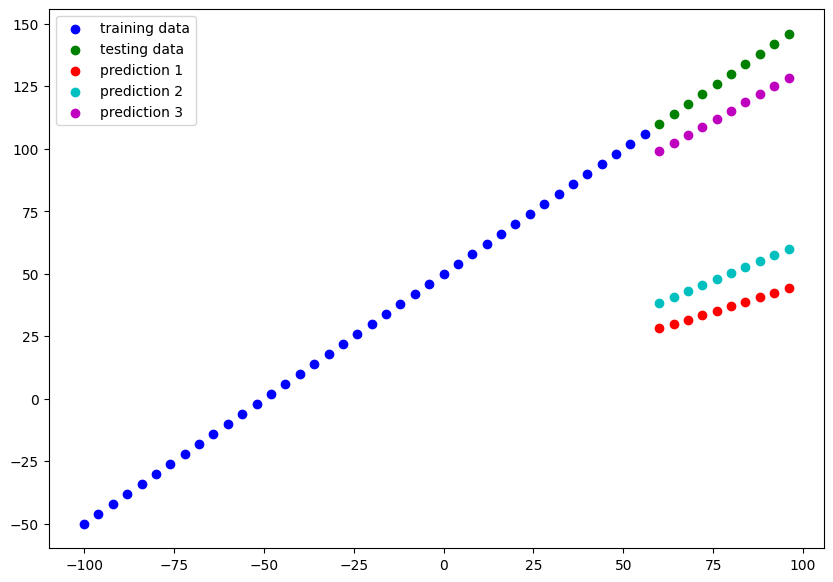

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.scatter(X_test, y_pred_1, c="r", label="prediction 1")
plt.scatter(X_test, y_pred_2, c="c", label="prediction 2")
plt.scatter(X_test, y_pred_3, c="m", label="prediction 3")
plt.legend();

## Conclusion
1. changing the optimizer from SGD to Adam significantly increases the model's accuracy

## Creating model 4

In [20]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape = [1],name="input_layer"),
    tf.keras.layers.Dense(100, input_shape = [1],name="hidden_layer_1"),
    tf.keras.layers.Dense(1,name="output_layer")
])

model_4.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
               metrics = ["mae"])

model_4.summary(), model_3.summary(), model_2.summary(), model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               5100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                

(None, None, None, None)

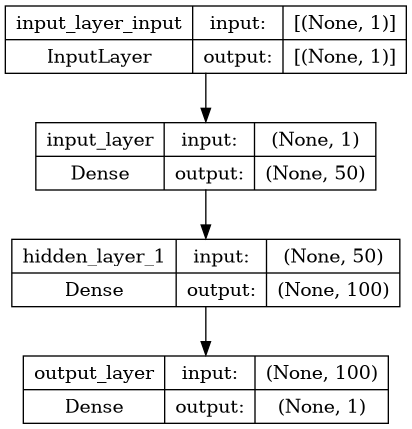

In [21]:
plot_model(model_4, show_shapes=True)

In [22]:
model_4.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 44.2532 - mae: 44.2532
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 52.1558 - mae: 52.1558
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 45.2942 - mae: 45.2942
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 47.6259 - mae: 47.6259
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 37.5526 - mae: 37.5526
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 44.4645 - mae: 44.4645
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 45.1510 - mae: 45.1510
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 39.1469 - mae: 39.1469
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 37.9040 - mae: 37.9040
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 40.0493 - mae: 40.0493
Epoch 11/100
2/2 [==============================] - 0s 6ms

In [23]:
y_pred_4 = model_4.predict(X_test)
y_pred_4, y_test

1/1 [==============================] - 0s 50ms/step


(array([[117.43983 ],
        [121.937996],
        [126.43618 ],
        [130.93433 ],
        [135.4325  ],
        [139.93068 ],
        [144.42883 ],
        [148.92702 ],
        [153.42519 ],
        [157.92336 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

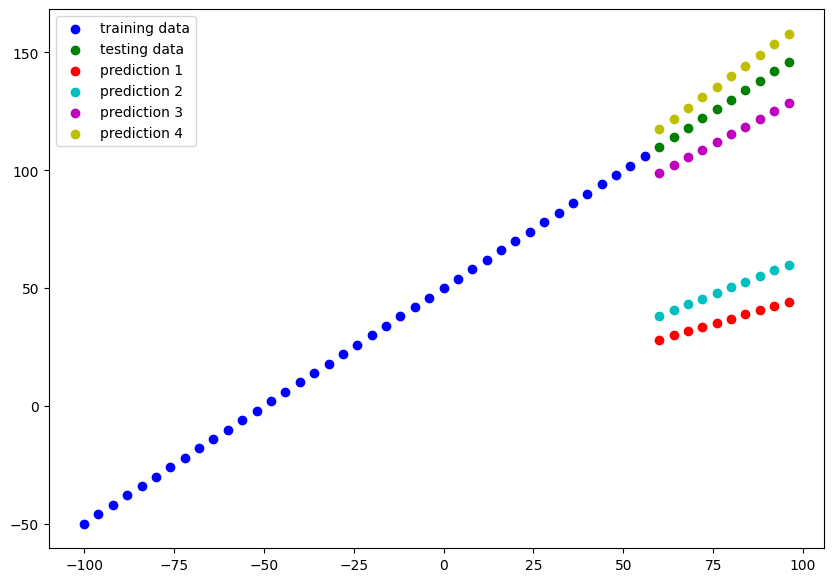

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.scatter(X_test, y_pred_1, c="r", label="prediction 1")
plt.scatter(X_test, y_pred_2, c="c", label="prediction 2")
plt.scatter(X_test, y_pred_3, c="m", label="prediction 3")
plt.scatter(X_test, y_pred_4, c="y", label="prediction 4")
plt.legend();

## Conclusion
1. the prediction deviate lesser than the last model
2. suspected entry from hidden layer 

## Creating model_5

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(100, input_shape=[1],name="hidden_layer_1"),
    tf.keras.layers.Dense(100, input_shape=[1],name="hidden_layer_2"),
    tf.keras.layers.Dense(1,name="output_layer")
])

model_5.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ["mae"])

model_5.summary(), model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 50)                100       
                                                                 
 hidden_layer_1 (Dense)      (None, 100)               5100      
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 15401 (60.16 KB)
Trainable params: 15401 (60.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #

(None, None)

In [26]:
model_5.fit(X_train, y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 59.3540 - mae: 59.3540
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 57.7032 - mae: 57.7032
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 69.2578 - mae: 69.2578
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 44.5164 - mae: 44.5164
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 47.2044 - mae: 47.2044
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 47.5547 - mae: 47.5547
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 39.2647 - mae: 39.2647
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 43.2758 - mae: 43.2758
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 43.4854 - mae: 43.4854
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 38.8085 - mae: 38.8085
Epoch 11/100
2/2 [==============================] - 0s 8ms/

In [27]:
y_pred_5 = model_5.predict(X_test)

y_pred_5, y_test

1/1 [==============================] - 0s 57ms/step


(array([[111.990715],
        [116.05343 ],
        [120.11614 ],
        [124.178856],
        [128.24158 ],
        [132.30428 ],
        [136.36699 ],
        [140.42973 ],
        [144.49245 ],
        [148.55513 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([110, 114, 118, 122, 126, 130, 134, 138, 142, 146], dtype=int32)>)

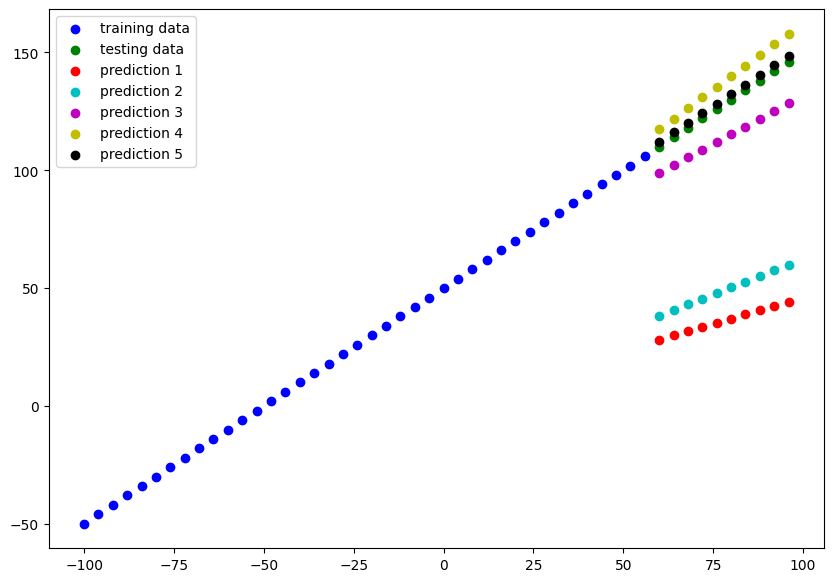

In [28]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c="b", label="training data")
plt.scatter(X_test, y_test, c="g", label="testing data")
plt.scatter(X_test, y_pred_1, c="r", label="prediction 1")
plt.scatter(X_test, y_pred_2, c="c", label="prediction 2")
plt.scatter(X_test, y_pred_3, c="m", label="prediction 3")
plt.scatter(X_test, y_pred_4, c="y", label="prediction 4")
plt.scatter(X_test, y_pred_5, c="k", label="prediction 5")
plt.legend();

## Conclusion
1. when i add more layers (another 1 layer with 100 neurons, the MAE significantly lowered.
2. but when i generate the prediction, the output is not promising 
3. i'm somewhat sure it is overfitting

## Creating model_6